['Wholesale' 'Distributor' 'Export']
['NZD' 'USD' 'GBP' 'EUR' 'AUD']
['AXW291' 'GUT930' 'NXH382' 'FLR025']


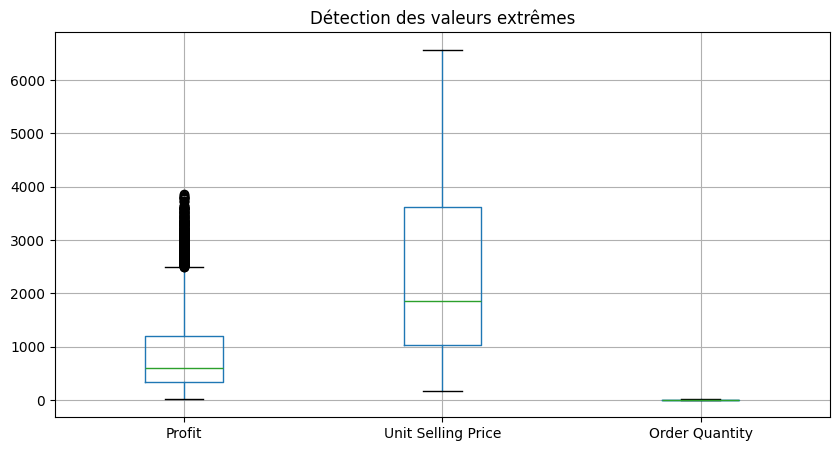

Doublons : 0 lignes en double
Total des ventes par année :
 Year
2017    52580534.7
2018    53463661.7
2019    48528944.2
Name: Total Sales, dtype: float64
Profit total par année :
 Year
2017    1.967777e+07
2018    1.978919e+07
2019    1.832218e+07
Name: Total Profit, dtype: float64
Marge bénéficiaire par année (%) :
 Year
2017    37.246409
2018    37.254386
2019    37.624803
Name: Profit Margin %, dtype: float64
Nombre total de commandes par année :
 Year
2017    2715
2018    2736
2019    2540
Name: OrderNumber, dtype: int64
Variation des ventes d’une année sur l’autre :
       Year  Sales YOY
1     2017    10874.1
2     2017   -17225.7
3     2017    -2773.8
4     2017    10498.9
5     2017     1963.1
...    ...        ...
7986  2019    -7349.9
7987  2019    12147.1
7988  2019    21239.0
7989  2019   -16656.2
7990  2019    24997.7

[7988 rows x 2 columns]
Ventes par produit :
 Product Description Index
1     25489299.1
2     22846497.5
3      3066281.8
4      2857288.7
5     17021155

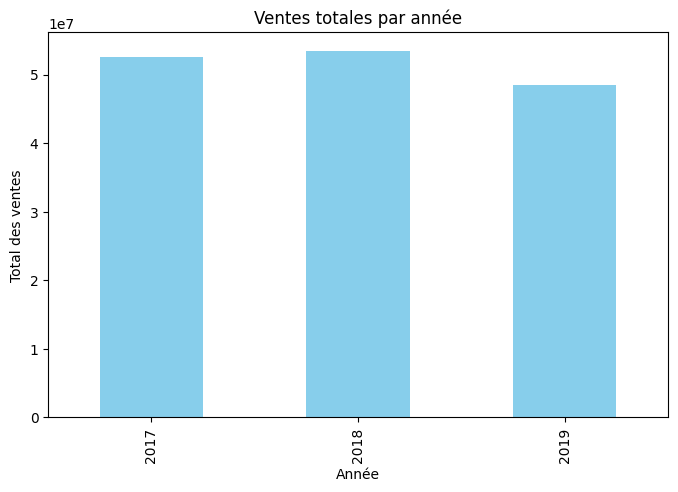

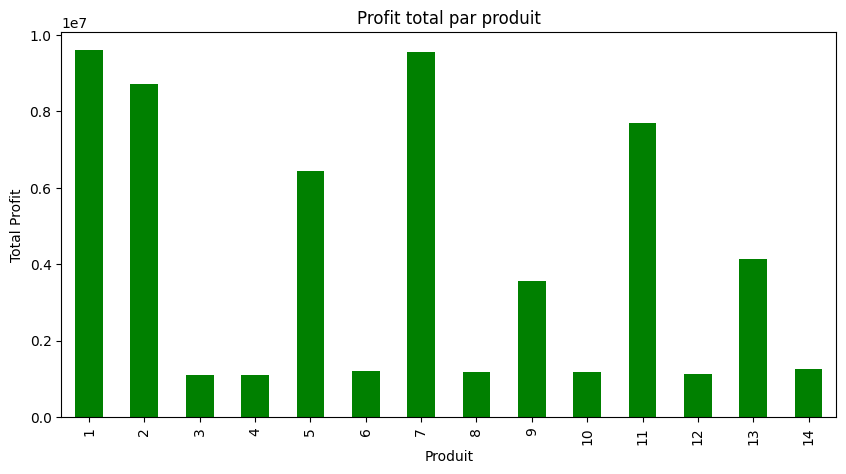

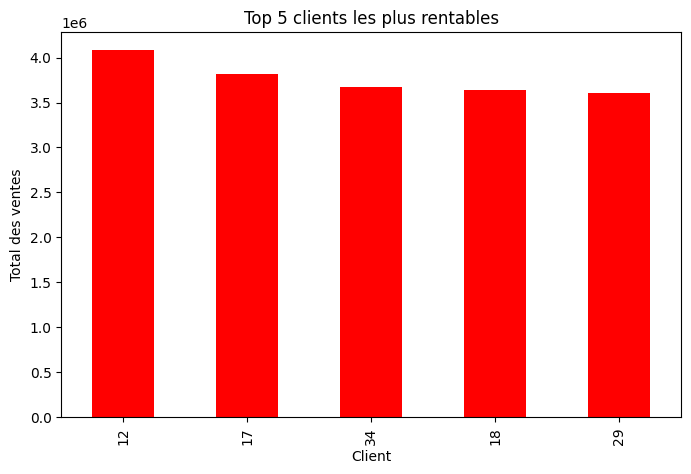

-----------------------------------------------------------------------------------------------------------------------------------------
       OrderNumber  OrderDate  Ship Date  Customer Name Index      Channel  \
0      SO - 000225 2017-01-01 2017-01-13                   28    Wholesale   
1     SO - 0003378 2017-01-01 2017-01-06                    7  Distributor   
2     SO - 0003901 2017-01-01 2017-01-05                   12    Wholesale   
3     SO - 0005126 2017-01-01 2017-01-17                    5    Wholesale   
4     SO - 0005614 2017-01-01 2017-01-07                   27       Export   
...            ...        ...        ...                  ...          ...   
7986  SO - 0005237 2019-12-12 2019-12-16                   41    Wholesale   
7987  SO - 0005477 2019-12-12 2019-12-27                   28  Distributor   
7988  SO - 0006936 2019-12-12 2019-12-27                   30    Wholesale   
7989  SO - 0007126 2019-12-12 2019-12-25                    6  Distributor   
7990

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "sales.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
"""print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)
"""
if "Profit" not in df.columns:
    df["Profit"] = df["Unit Selling Price"] - df["Unit Cost"]


if "Year"  not in df.columns:
    df["Year"] = df["OrderDate"].dt.year

if "Month" not in df.columns:
    df["Month"] = df["OrderDate"].dt.month_name()

if "Weekday" not in df.columns:
    df["Weekday"] = df["OrderDate"].dt.day_name()

print(df["Channel"].unique())
print(df["Currency Code"].unique())
print(df["Warehouse Code"].unique())

df[["Profit", "Unit Selling Price", "Order Quantity"]].boxplot(figsize=(10, 5))
plt.title("Détection des valeurs extrêmes")
plt.show()
print(f"Doublons : {df.duplicated().sum()} lignes en double")
df = df.drop_duplicates()

if "Total Sales" not in df.columns:
    df["Total Sales"] = df["Order Quantity"] * df["Unit Selling Price"]

if "Total Profit" not in df.columns:
    df["Total Profit"] = df["Profit"] * df["Order Quantity"]

if "Profit Margin %" not in df.columns:
    df["Profit Margin %"] = (df["Total Profit"] / df["Total Sales"]) * 100

if "Sales YOY" not in df.columns:
    df["Sales YOY"] = df.groupby("Year")["Total Sales"].diff()


sales_per_year = df.groupby("Year")["Total Sales"].sum()
print("Total des ventes par année :\n", sales_per_year)
profit_per_year = df.groupby("Year")["Total Profit"].sum()
print("Profit total par année :\n", profit_per_year)
profit_margin_per_year = df.groupby("Year")["Profit Margin %"].mean()
print("Marge bénéficiaire par année (%) :\n", profit_margin_per_year)
total_orders_per_year = df.groupby("Year")["OrderNumber"].nunique()
print("Nombre total de commandes par année :\n", total_orders_per_year)
print("Variation des ventes d’une année sur l’autre :\n", df[["Year", "Sales YOY"]].dropna())

sales_per_product = df.groupby("Product Description Index")["Total Sales"].sum()
profit_per_product = df.groupby("Product Description Index")["Total Profit"].sum()

print("Ventes par produit :\n", sales_per_product)
print("Profits par produit :\n", profit_per_product)

top_customers = df.groupby("Customer Name Index")["Total Sales"].sum().sort_values(ascending=False).head(5)
print("Top 5 clients les plus rentables :\n", top_customers)

sales_per_region = df.groupby("Delivery Region Index")["Total Sales"].sum()
print("Ventes par région :\n", sales_per_region)


sales_per_month = df.groupby("Month")["Total Sales"].sum()
print("Ventes par mois :\n", sales_per_month)

sales_per_channel = df.groupby("Channel")["Total Sales"].sum()
print("Ventes par canal de vente :\n", sales_per_channel)



sales_per_year.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Ventes totales par année")
plt.xlabel("Année")
plt.ylabel("Total des ventes")
plt.show()




profit_per_product.plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Profit total par produit")
plt.xlabel("Produit")
plt.ylabel("Total Profit")
plt.show()

# Comparaison des bénéfices par canal avec l'année précédente
df["Previous Year Profit"] = df.groupby("Channel")["Total Profit"].shift(1)
df["Profit Growth"] = df["Total Profit"] - df["Previous Year Profit"]

# Top 5 clients qui rapportent le plus d'argent
top_5_clients = df.groupby("Customer Name Index")["Total Sales"].sum().nlargest(5)

plt.figure(figsize=(8,5))
top_5_clients.plot(kind="bar", color="red")
plt.title("Top 5 clients les plus rentables")
plt.xlabel("Client")
plt.ylabel("Total des ventes")
plt.show()


print("-----------------------------------------------------------------------------------------------------------------------------------------")
#print(df)